In [168]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [221]:
aaa = np.load('/root/real2sim/real2sim/output/Move-v1/2023-04-16 23:26:24.005378/parameters.npy')

In [228]:
def plot_(aaa, ylabel):
    fig = plt.figure()
    aaa_list = []
    for a in aaa:
        aaa_list.append(a)
    plt.plot(aaa_list)
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    

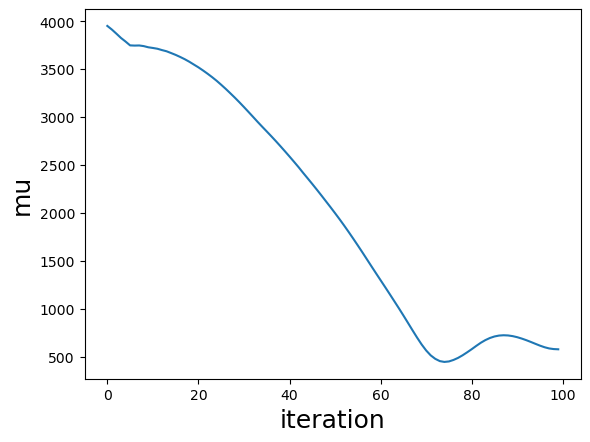

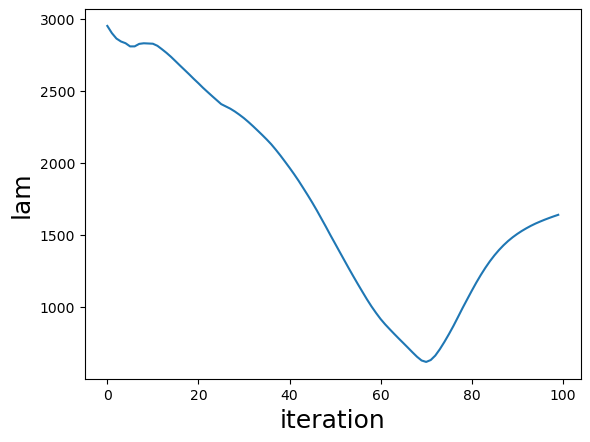

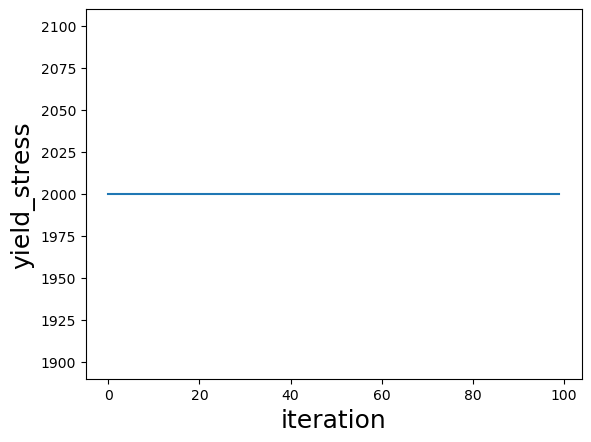

In [229]:
para = np.load('/root/real2sim/real2sim/output/Move-v1/2023-04-16 23:26:24.005378/parameters.npy')
plot_(para[:, 0], 'mu')
plot_(para[:, 1], 'lam')
plot_(para[:, 2], 'yield_stress')

In [ ]:
target_grids = np.load('/root/real2sim/sim2sim/test/fric_1.5/expert_0.0383_12:11:54_grid_mass.npy')
for i in range(target_grids.shape[0]):
    target_grid = target_grids[i]
    position_list = []
    for x in range(target_grid.shape[0]):
        for y in range(target_grid.shape[1]):
            for z in range(target_grid.shape[2]):
                if target_grid[x][y][z] > 0:
                    position_list.append([x/64, y/64, z/64])
    position = np.array(position_list)
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    ax1.scatter(position[:, 0], position[:, 2], position[:, 1], s=1)
    ax1.view_init(30, 60)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.set_zlim(0, 1)

In [212]:
real = np.load('/root/real2sim/real2sim/points/real_pcds.npy', allow_pickle=True)
sim = np.load('/root/real2sim/real2sim/points/sim_pcds.npy', allow_pickle=True)
action = np.load('/root/real2sim/real2sim/points/action.npy', allow_pickle=True)
print(len(real), len(sim), len(action))

114 114 114


In [ ]:
z_scale = 0.2
for i in range(80):
    fig = plt.figure(figsize=(15, 5))
    plt.title(f'step{i}')
    sim_pcd = sim[i]
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.scatter(sim_pcd[:, 0], sim_pcd[:, 2], sim_pcd[:, 1], s=1)
    ax1.view_init(30, 60)
    ax1.set_zlim(0, z_scale)
    max_sim_pcd = sim_pcd.max(axis=0)

    real_pcd = real[i]
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.scatter(np.clip(real_pcd[:, 0], 0, max_sim_pcd[0]), np.clip(real_pcd[:, 2], 0, max_sim_pcd[2]), np.clip(real_pcd[:, 1], 0, max_sim_pcd[1]), s=1)
    ax2.view_init(30, 60)
    ax2.set_zlim(0, z_scale)

    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.scatter(real_pcd[:, 0], real_pcd[:, 2], real_pcd[:, 1], s=1)
    ax3.view_init(30, 60)
    ax3.set_zlim(0, z_scale)
    

In [ ]:
frame = 50
for i in range(0, 360, 45):
    fig = plt.figure(figsize=(15, 5))
    sim_pcd = sim[frame]
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.scatter(sim_pcd[:, 0], sim_pcd[:, 2], sim_pcd[:, 1], s=1)
    ax1.view_init(30, 60)
    ax1.set_zlim(0, z_scale)
    max_sim_pcd = sim_pcd.max(axis=0)

    real_pcd = real[frame]
    ax1.scatter(np.clip(real_pcd[:, 0], 0, max_sim_pcd[0]), np.clip(real_pcd[:, 2], 0, max_sim_pcd[2]), np.clip(real_pcd[:, 1], 0, max_sim_pcd[1]), s=1)
    ax1.view_init(30, 60)
    ax1.set_zlim(0, z_scale)


    ax1.view_init(None, i)
        

In [ ]:
z_scale = 0.2
for i in range(160):
    fig = plt.figure(figsize=(15, 5))
    plt.title(f'step{i}')
    sim_pcd = sim[i]
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.scatter(sim_pcd[:, 0], sim_pcd[:, 2], sim_pcd[:, 1], s=1)
    ax1.view_init(30, 60)
    ax1.set_zlim(0, z_scale)
    max_sim_pcd = sim_pcd.max(axis=0)

    real_pcd = real[i]
    ax1.scatter(np.clip(real_pcd[:, 0], 0, max_sim_pcd[0]), np.clip(real_pcd[:, 2], 0, max_sim_pcd[2]), np.clip(real_pcd[:, 1], 0, max_sim_pcd[1]), s=1)
    ax1.view_init(30, 60)
    ax1.set_zlim(0, z_scale)

    sim_pcd = sim[i]
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.scatter(sim_pcd[:, 0], sim_pcd[:, 2], sim_pcd[:, 1], s=1)
    ax2.view_init(100, 60)
    ax2.set_zlim(0, z_scale)
    max_sim_pcd = sim_pcd.max(axis=0)

    real_pcd = real[i]
    ax2.scatter(np.clip(real_pcd[:, 0], 0, max_sim_pcd[0]), np.clip(real_pcd[:, 2], 0, max_sim_pcd[2]), np.clip(real_pcd[:, 1], 0, max_sim_pcd[1]), s=1)
    ax2.view_init(100, 60)
    ax2.set_zlim(0, z_scale)

    sim_pcd = sim[i]
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.scatter(sim_pcd[:, 0], sim_pcd[:, 2], sim_pcd[:, 1], s=1)
    ax3.view_init(0, 180)
    ax3.set_zlim(0, z_scale)
    max_sim_pcd = sim_pcd.max(axis=0)

    real_pcd = real[i]
    ax3.scatter(np.clip(real_pcd[:, 0], 0, max_sim_pcd[0]), np.clip(real_pcd[:, 2], 0, max_sim_pcd[2]), np.clip(real_pcd[:, 1], 0, max_sim_pcd[1]), s=1)
    ax3.view_init(0, 180)
    ax3.set_zlim(0, z_scale)